# Marketing Project: H & M

### Obejctive:

The objective of this marketing analytics project is to provide insights into H&M's sales performance by using data-driven techniques. The project aims to:

1. **Understand Sales Patterns**: Analyze sales trends and identify the impact of key variables like pricing, discounts, and customer reviews on revenue generation.
  
2. **Segment Customers**: Utilize clustering techniques to group customers based on purchasing behavior, enabling targeted marketing strategies.
  
3. **Evaluate Promotional Effectiveness**: Assess the role of discounts in driving sales and influencing customer decision-making.
  
4. **Identify Seasonal Trends**: Explore seasonality in sales to align promotional strategies with peak demand periods.
  
5. **Support Strategic Decision-Making**: Provide recommendations to optimize pricing, promotions, and product offerings based on analytical findings.  



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\ikjot_0qtl66y\OneDrive\Desktop\Marketing analytics\individual lab\H&M-products-csv.csv")

In [3]:
df.shape

(7260, 24)

In [4]:
df.columns

Index(['product_url', 'product_name', 'mrp', 'discount', 'sale_price',
       'no_of_reviews', 'description', 'article_no', 'material',
       'fabric_weight', 'care_instructions', 'dimension', 'fit', 'length',
       'sleev_length', 'neckline', 'concept', 'country_of_production',
       'common_generic_name', 'date_of_import', 'net_quantity',
       'marketed_and_imported', 'style', 'color_and_pattern'],
      dtype='object')

## Data Cleaning

In [5]:
#drop product_url
h_and_m = df.drop('product_url',axis =1)

In [6]:
# Check for missing values
missing_values = h_and_m.isnull().sum()

print(missing_values)


product_name             0
mrp                      0
discount                 0
sale_price               0
no_of_reviews            0
description              0
article_no               0
material                 0
fabric_weight            0
care_instructions        0
dimension                0
fit                      0
length                   0
sleev_length             0
neckline                 0
concept                  0
country_of_production    0
common_generic_name      0
date_of_import           0
net_quantity             0
marketed_and_imported    0
style                    0
color_and_pattern        0
dtype: int64


In [7]:
# Count occurrences of "Not Available" by column
not_available_values_by_column = (h_and_m == "Not Available").sum()

print(not_available_values_by_column)


product_name                0
mrp                         0
discount                    0
sale_price                  0
no_of_reviews               0
description                 0
article_no                  0
material                    0
fabric_weight               0
care_instructions         590
dimension                 246
fit                      1154
length                    983
sleev_length             2669
neckline                 3887
concept                  1748
country_of_production       0
common_generic_name         0
date_of_import            372
net_quantity                0
marketed_and_imported     418
style                    2257
color_and_pattern           3
dtype: int64


In [8]:
# Check for duplicates
duplicate_entries = h_and_m.duplicated().sum()
print(duplicate_entries)

0


In [9]:

# List of columns to fill with the mode
columns_to_fill_mode = [
    'sleev_length', 'neckline', 'concept', 'marketed_and_imported', 
    'style', 'length', 'fit', 'dimension' ,'care_instructions', 'date_of_import', 
    'color_and_pattern'
]

# Replace "Not Available" with NaN in all specified columns
h_and_m[columns_to_fill_mode] = h_and_m[columns_to_fill_mode].replace("Not Available", np.nan)

# Fill missing values (NaN) in each specified column with the mode
for column in columns_to_fill_mode:
    mode_value = h_and_m[column].mode()[0]  # Get the mode (most common value) for the column
    h_and_m[column] = h_and_m[column].fillna(mode_value)  # Fill NaN with mode

# Verify if missing values have been filled
print(h_and_m.isnull().sum())  # This should show zero missing values in the specified columns


product_name             0
mrp                      0
discount                 0
sale_price               0
no_of_reviews            0
description              0
article_no               0
material                 0
fabric_weight            0
care_instructions        0
dimension                0
fit                      0
length                   0
sleev_length             0
neckline                 0
concept                  0
country_of_production    0
common_generic_name      0
date_of_import           0
net_quantity             0
marketed_and_imported    0
style                    0
color_and_pattern        0
dtype: int64


In [10]:
# Count occurrences of "Not Available" by column
not_available_values_by_column = (h_and_m == "Not Available").sum()

print(not_available_values_by_column)


product_name             0
mrp                      0
discount                 0
sale_price               0
no_of_reviews            0
description              0
article_no               0
material                 0
fabric_weight            0
care_instructions        0
dimension                0
fit                      0
length                   0
sleev_length             0
neckline                 0
concept                  0
country_of_production    0
common_generic_name      0
date_of_import           0
net_quantity             0
marketed_and_imported    0
style                    0
color_and_pattern        0
dtype: int64


In [11]:
# Convert date columns to datetime 
h_and_m['date_of_import'] = pd.to_datetime(h_and_m['date_of_import'], format='%m-%Y')
h_and_m['date_of_import']

0      2024-03-01
1      2024-02-01
2      2023-11-01
3      2024-01-01
4      2023-08-01
          ...    
7255   2024-02-01
7256   2024-03-01
7257   2024-02-01
7258   2024-04-01
7259   2024-03-01
Name: date_of_import, Length: 7260, dtype: datetime64[ns]

In [12]:
# getting unique values for net quantity
import re

# Function to extract primary quantity from each entry
def extract_quantity(value):
    # Extract all numeric values
    numbers = re.findall(r'\d+', value)
    
    # Return the first number as integer if found, otherwise default to 1 (assumes 1 if no specific quantity is found)
    return int(numbers[0]) if numbers else 1

# Apply the function to the net_quantity column
h_and_m['net_quantity_cleaned'] = h_and_m['net_quantity'].apply(extract_quantity)

In [13]:
# Check unique values in the cleaned column to confirm extraction
print(h_and_m['net_quantity_cleaned'].unique())


[ 1  2  3  5  4 10  6 14  7 20]


## Exploratory Data Analysis following the 4 P's Framework

In [14]:
h_and_m.describe()

,mrp,discount,sale_price,no_of_reviews,date_of_import,net_quantity_cleaned
count,7260.000000,7260.000000,7260.000000,7260.000000,7260,7260.000000
mean,2038.944904,0.488981,2033.048209,202.842287,2023-10-30 17:25:17.355372032,1.147383
min,299.000000,0.000000,299.000000,0.000000,2020-12-01 00:00:00,1.000000
25%,1299.000000,0.000000,1299.000000,2.000000,2023-08-01 00:00:00,1.000000
50%,1799.000000,0.000000,1799.000000,12.000000,2024-01-01 00:00:00,1.000000
75%,2299.000000,0.000000,2299.000000,69.000000,2024-03-01 00:00:00,1.000000
max,29999.000000,60.000000,29999.000000,6646.000000,2024-05-01 00:00:00,20.000000
std,1449.661188,4.016671,1453.318007,716.090537,NaN,0.849325


#### 1. Price

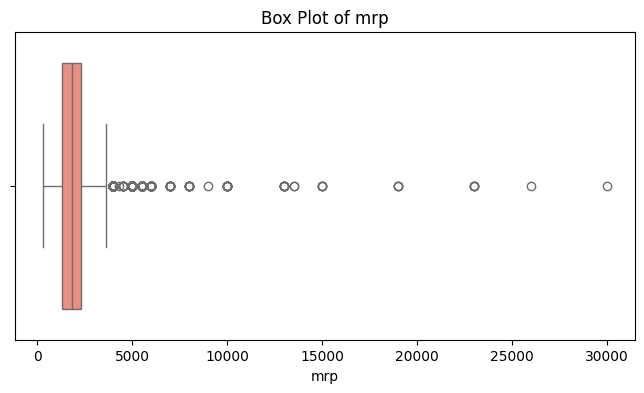

In [15]:
# Plot box plots for numerical columns to identify outliers visually
numerical_columns = ['mrp']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=h_and_m, x=column, color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


In [16]:


# Calculate median, min, and max directly from MRP column
median_price = h_and_m['mrp'].median()  # Median price
range_min = h_and_m['mrp'].min()       # Minimum price
range_max = h_and_m['mrp'].max()       # Maximum price

# Calculate the Interquartile Range (IQR) for outlier detection
Q1 = h_and_m['mrp'].quantile(0.25)
Q3 = h_and_m['mrp'].quantile(0.75)
IQR = Q3 - Q1

# Outlier detection: Points outside the range of 1.5*IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outliers (values outside the bounds)
outliers = h_and_m[(h_and_m['mrp'] < lower_bound) | (h_and_m['mrp'] > upper_bound)]

# Visual insights for the boxplot
print("\nInsights from Boxplot of MRP:")
print(f"Median Price: Rs. {median_price}, which is the middle value in the dataset.")
print(f"Range: Most prices fall between Rs. {range_min} and approximately Rs. {range_max}, highlighting where the majority of products are priced.")
print(f"Outliers: Prices above Rs. 29999 are considered outliers—these are products that are priced much higher than most others, likely indicating special items.")

# Print number of outliers
print(f"Number of outliers: {outliers.shape[0]}")



Insights from Boxplot of MRP:
Median Price: Rs. 1799.0, which is the middle value in the dataset.
Range: Most prices fall between Rs. 299 and approximately Rs. 29999, highlighting where the majority of products are priced.
Outliers: Prices above Rs. 29999 are considered outliers—these are products that are priced much higher than most others, likely indicating special items.
Number of outliers: 659


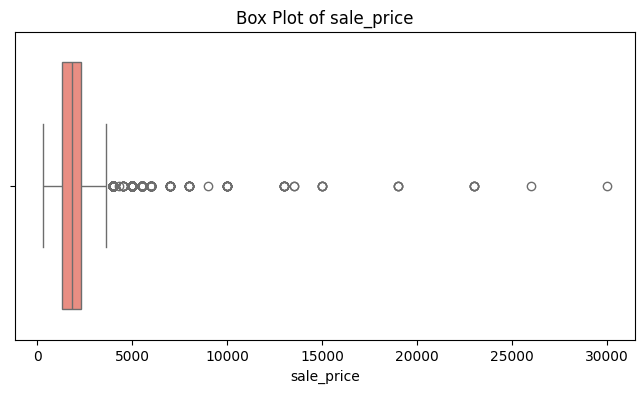

In [17]:
numerical_columns = ['sale_price']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=h_and_m, x=column, color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

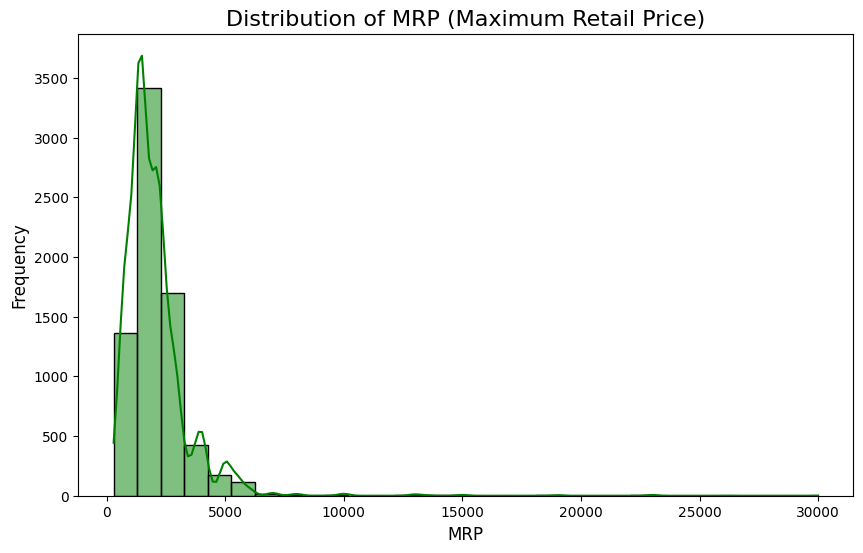

In [18]:

# Plotting the histogram for MRP
plt.figure(figsize=(10, 6))
sns.histplot(h_and_m['mrp'], bins=30, kde=True, color='green')

# Add title and labels
plt.title('Distribution of MRP (Maximum Retail Price)', fontsize=16)
plt.xlabel('MRP', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

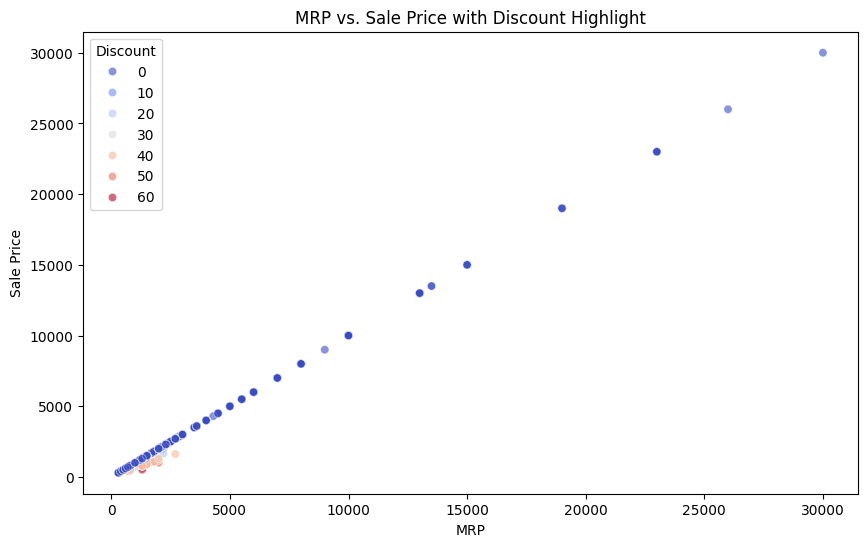

In [19]:

# MRP vs. Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=h_and_m, x='mrp', y='sale_price', hue='discount', palette='coolwarm', alpha=0.6)
plt.title("MRP vs. Sale Price with Discount Highlight")
plt.xlabel("MRP")
plt.ylabel("Sale Price")
plt.legend(title="Discount")
plt.show()


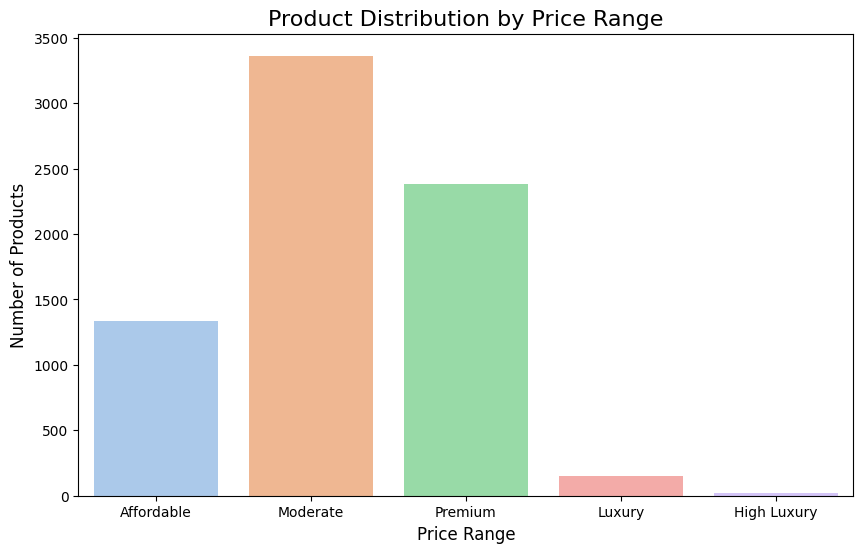


Insights from Price Range Distribution:
Affordable Range: 1337 products (18.4%) fall into this range.
Moderate Range: 3363 products (46.3%) fall into this range.
Premium Range: 2386 products (32.9%) fall into this range.
Luxury Range: 152 products (2.1%) fall into this range.
High Luxury Range: 22 products (0.3%) fall into this range.


In [20]:

# Define price ranges
price_ranges = {
    'Affordable': (0, 999),   # Products priced up to 999
    'Moderate': (1000, 1999),  # Products priced between 1000 and 1999
    'Premium': (2000, 4999),   # Products priced between 2000 and 4999
    'Luxury': (5000, 9999),    # Products priced between 5000 and 9999
    'High Luxury': (10000, h_and_m['mrp'].max())  # Products priced above 10000
}


# Count the number of products in each price range
price_range_counts = {}
for range_name, (min_price, max_price) in price_ranges.items():
    count = len(h_and_m[(h_and_m['mrp'] >= min_price) & (h_and_m['mrp'] <= max_price)])
    price_range_counts[range_name] = count

# Calculate percentage for each range
total_products = len(h_and_m)
price_range_percentages = {range_name: (count / total_products) * 100 for range_name, count in price_range_counts.items()}

# Visualize the price ranges distribution using a bar plot

# Plot the counts of products in each price range
price_range_names = list(price_range_counts.keys())
price_range_values = list(price_range_counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_names, y=price_range_values, hue=price_range_names, palette="pastel")  
plt.title('Product Distribution by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.show()

# Insights for each price range
print("\nInsights from Price Range Distribution:")
for range_name in price_range_counts:
    count = price_range_counts[range_name]
    percentage = price_range_percentages[range_name]
    print(f"{range_name} Range: {count} products ({percentage:.1f}%) fall into this range.")


#### 2. Product

In [21]:
#Number of unique products
num_products = h_and_m['product_name'].nunique()
num_products

2507

Top 10 Most Purchased Products:
product_name
Ribbed vest top              91
Bikini bottoms               78
5-pack thong briefs          75
Oversized printed T-shirt    70
10-pack trainer socks        60
Printed T-shirt              58
3-pack liner socks           51
10-pack lace thong briefs    50
5-pack Brazilian briefs      50
Linen-blend trousers         47
Name: net_quantity_cleaned, dtype: int64


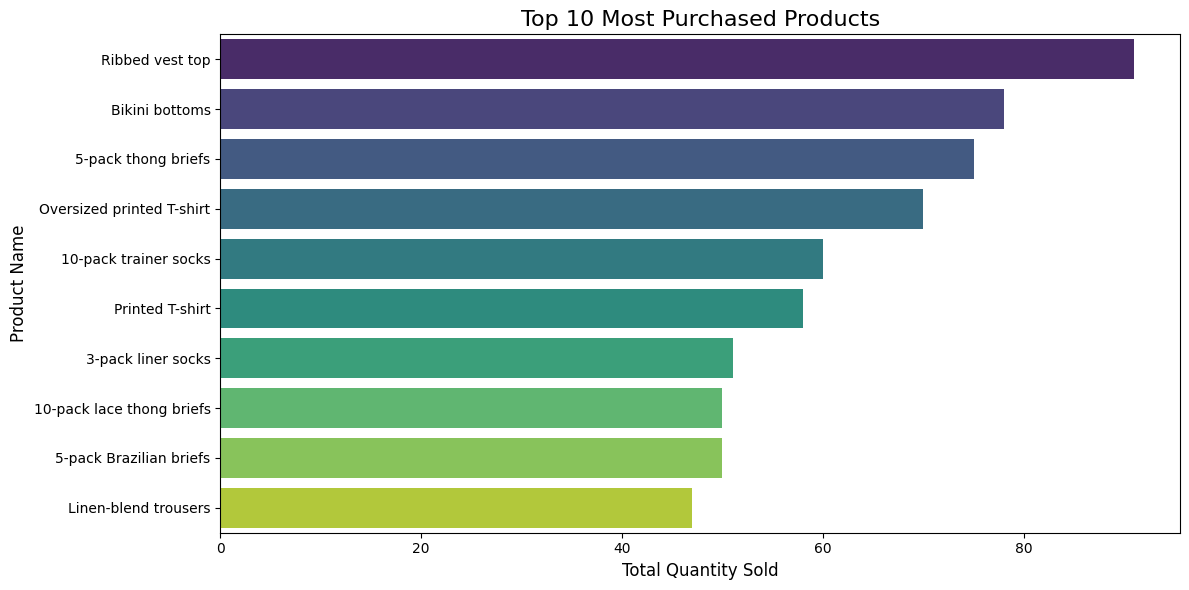

In [22]:

# Analyzing purchase frequency based on net_quantity 
purchase_patterns = h_and_m.groupby('product_name')['net_quantity_cleaned'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Purchased Products:")
print(purchase_patterns)

# Plotting top 10 purchased products
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_patterns.values, y=purchase_patterns.index, palette="viridis", hue = purchase_patterns.index)
plt.title("Top 10 Most Purchased Products", fontsize=16)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.tight_layout()
plt.show()


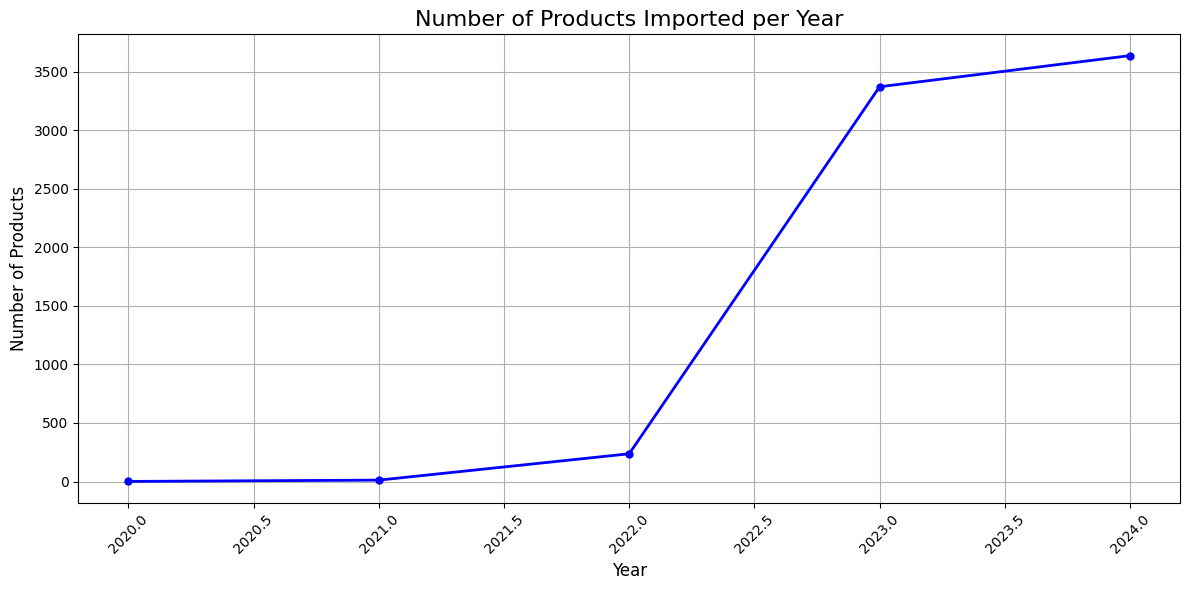

In [23]:
# Extract year from date_of_import 
h_and_m['import_year'] = h_and_m['date_of_import'].dt.year


# Count number of products imported each year
products_per_year = h_and_m.groupby('import_year').size()

# Plotting a line chart to show the trend of imports per year
plt.figure(figsize=(12, 6))
plt.plot(products_per_year.index, products_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Number of Products Imported per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

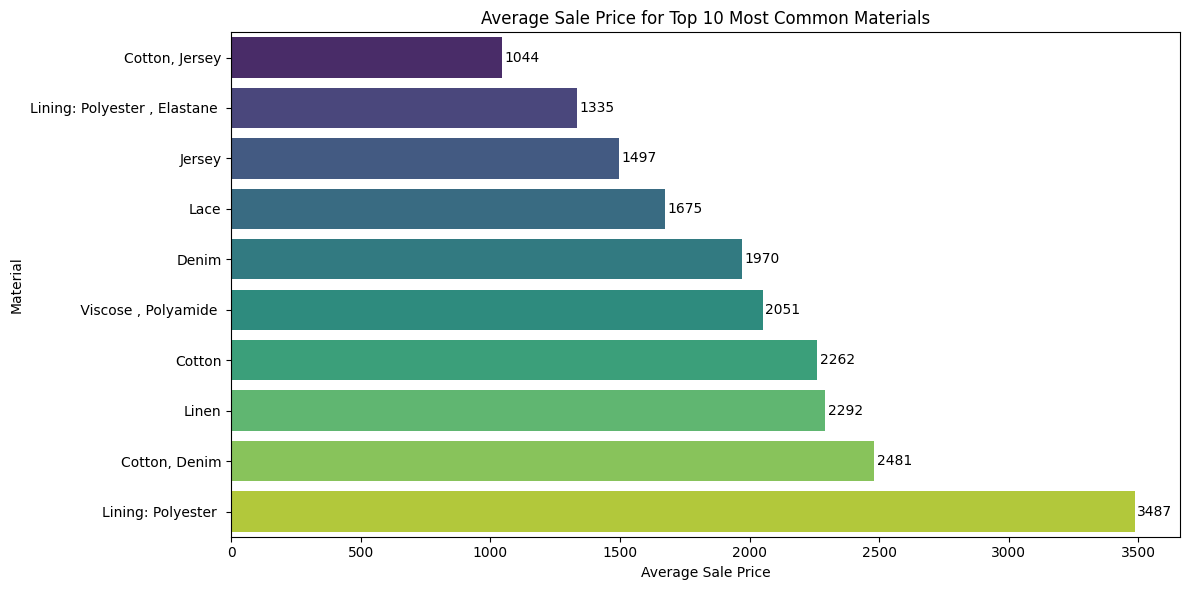

In [24]:


# Identify the top 10 most common materials
top_materials = h_and_m['material'].value_counts().index[:10]
filtered_data = h_and_m[h_and_m['material'].isin(top_materials)]

# Calculate the average sale price for each of the top materials
material_avg_price = filtered_data.groupby('material')['sale_price'].mean().sort_values()

# Plot the average sale price for each of the top materials
plt.figure(figsize=(12, 6))
sns.barplot(y=material_avg_price.index, x=material_avg_price.values, palette="viridis", hue =material_avg_price.index)

# Add data labels to each bar
for i, v in enumerate(material_avg_price.values):
    plt.text(v + 10, i, f'{v:.0f}', va='center', fontsize=10)

# Customize the plot
plt.title("Average Sale Price for Top 10 Most Common Materials")
plt.xlabel("Average Sale Price")
plt.ylabel("Material")
plt.tight_layout()

# Show the plot
plt.show()


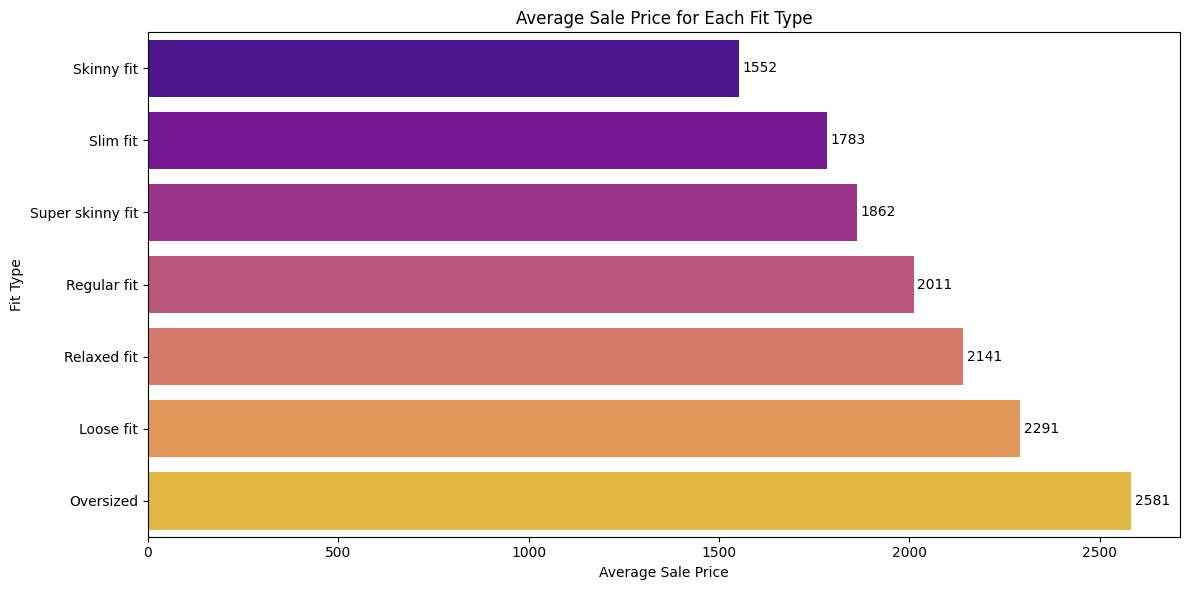

In [25]:


# Filter the data to include only records with non-null values in the 'fit' and 'sale_price' columns
filtered_data_fit = h_and_m.dropna(subset=['fit', 'sale_price'])

# Calculate the average sale price for each fit type
fit_avg_price = filtered_data_fit.groupby('fit')['sale_price'].mean().sort_values()

# Plot the average sale price for each fit type
plt.figure(figsize=(12, 6))
sns.barplot(y=fit_avg_price.index, x=fit_avg_price.values, palette="plasma",hue = fit_avg_price.index)

# Add data labels to each bar
for i, v in enumerate(fit_avg_price.values):
    plt.text(v + 10, i, f'{v:.0f}', va='center', fontsize=10)

# Customize the plot
plt.title("Average Sale Price for Each Fit Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Fit Type")
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\ikjot_0qtl66y\AppData\Local\Temp\ipykernel_27488\1594869944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sleeve_avg_price.index, x=sleeve_avg_price.values, palette="magma")


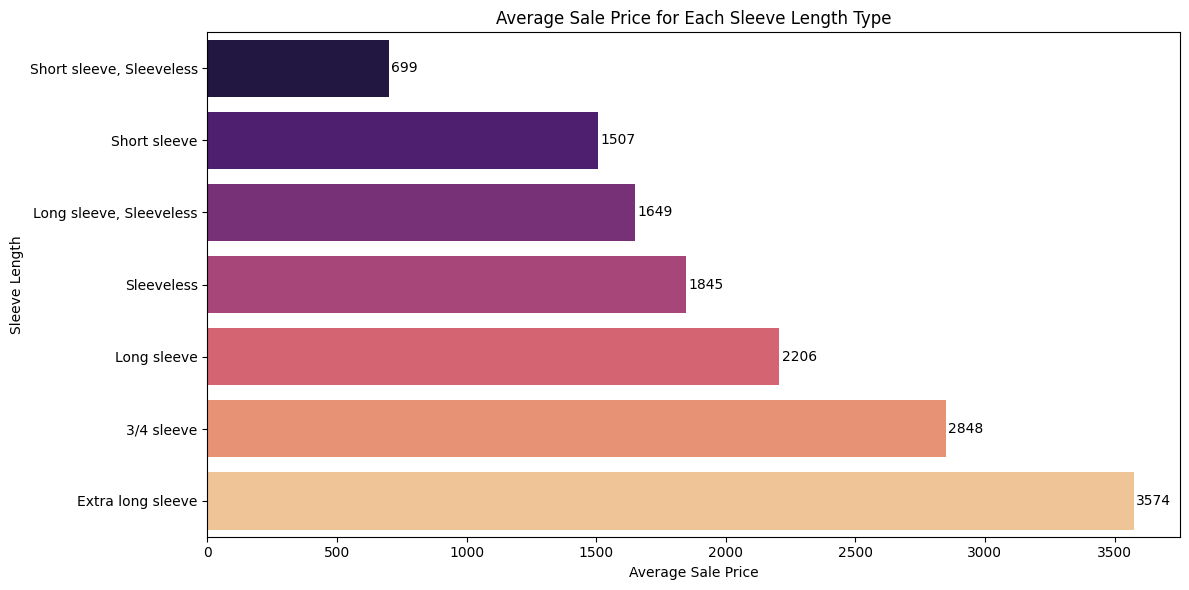

In [26]:
# Filter the data to include only records with non-null values in 'sleev_length' and 'sale_price' columns
filtered_data_sleeve = h_and_m.dropna(subset=['sleev_length', 'sale_price'])

# Calculate the average sale price for each sleeve length type
sleeve_avg_price = filtered_data_sleeve.groupby('sleev_length')['sale_price'].mean().sort_values()

# Plot the average sale price for each sleeve length type
plt.figure(figsize=(12, 6))
sns.barplot(y=sleeve_avg_price.index, x=sleeve_avg_price.values, palette="magma")

# Add data labels to each bar
for i, v in enumerate(sleeve_avg_price.values):
    plt.text(v + 10, i, f'{v:.0f}', va='center', fontsize=10)

# Customize the plot
plt.title("Average Sale Price for Each Sleeve Length Type")
plt.xlabel("Average Sale Price")
plt.ylabel("Sleeve Length")
plt.tight_layout()

# Show the plot
plt.show()


#### 3. Place

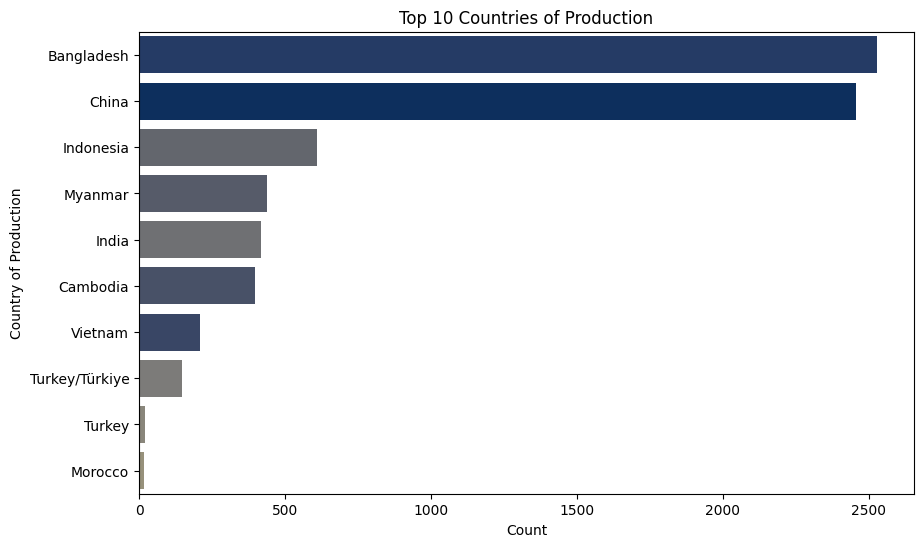

In [27]:
#  Top Countries of Production
plt.figure(figsize=(10, 6))
sns.countplot(y=h_and_m['country_of_production'], order=h_and_m['country_of_production'].value_counts().index[:10], palette="cividis", hue = h_and_m['country_of_production'])
plt.title("Top 10 Countries of Production")
plt.xlabel("Count")
plt.ylabel("Country of Production")
plt.show()

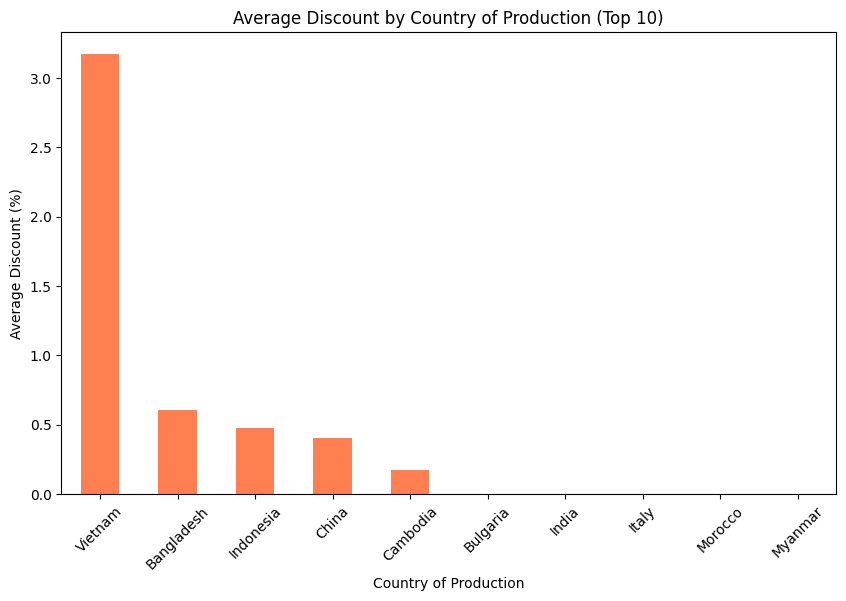

In [28]:
#  Country of Production vs. Average Discount
country_discount = h_and_m.groupby('country_of_production')['discount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
country_discount.plot(kind='bar', color='coral')
plt.title("Average Discount by Country of Production (Top 10)")
plt.xlabel("Country of Production")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45)
plt.show()


#### 4. Promotions

In [29]:
# Filter for products with a discount
discounted_products = h_and_m[h_and_m['discount'] > 0]

# Get the number of unique products with discounts
unique_discounted_products = discounted_products['product_name'].nunique()

# Display the result
print(f"Out of {num_products} unique products, {unique_discounted_products} had discounts.")


Out of 2507 unique products, 32 had discounts.


In [30]:
# `discount` is the column indicating discount value
discounted = h_and_m[h_and_m['discount'] > 0].shape[0]
not_discounted = h_and_m[h_and_m['discount'] == 0].shape[0]

print("Number of products with discounts in datset:", discounted)
print("Number of products without discounts in datatet:", not_discounted)

Number of products with discounts in datset: 120
Number of products without discounts in datatet: 7140


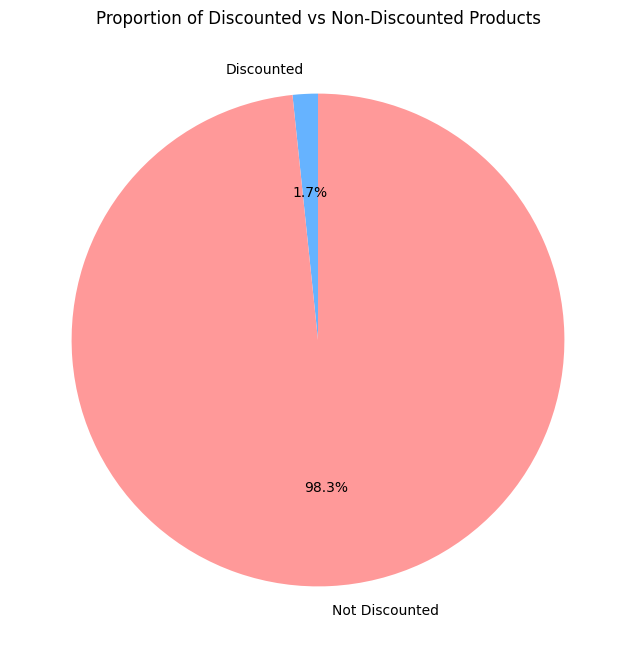

In [31]:


# Data for the pie chart
labels = ['Discounted', 'Not Discounted']
sizes = [discounted, not_discounted]
colors = ['#66b3ff','#ff9999']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Discounted vs Non-Discounted Products')
plt.show()


In [32]:
# Find the top 10 products with the highest absolute discount
top_discounted_products = h_and_m[['product_name', 'mrp', 'sale_price', 'discount']] \
    .sort_values(by='discount', ascending=False).head(10)

# Display top discounted products
print("Top 10 Discounted Products:")
print(top_discounted_products[['product_name', 'mrp', 'sale_price', 'discount']])


Top 10 Discounted Products:
                      product_name   mrp  sale_price  discount
2703      Brazilian bikini bottoms  1299         519        60
1793  Graphic-print bikini bottoms  1999         999        50
927         Hipster bikini bottoms  1299         649        50
3018           Worn-detail T-shirt   799         479        40
4939      Nylon parachute trousers  1499         899        40
6039        Straight Regular Jeans  2699        1619        40
1952      Nylon parachute trousers  1499         899        40
3087                Ribbed T-shirt   699         419        40
185       Nylon parachute trousers  1499         899        40
1685            Bootcut High Jeans  1999        1199        40


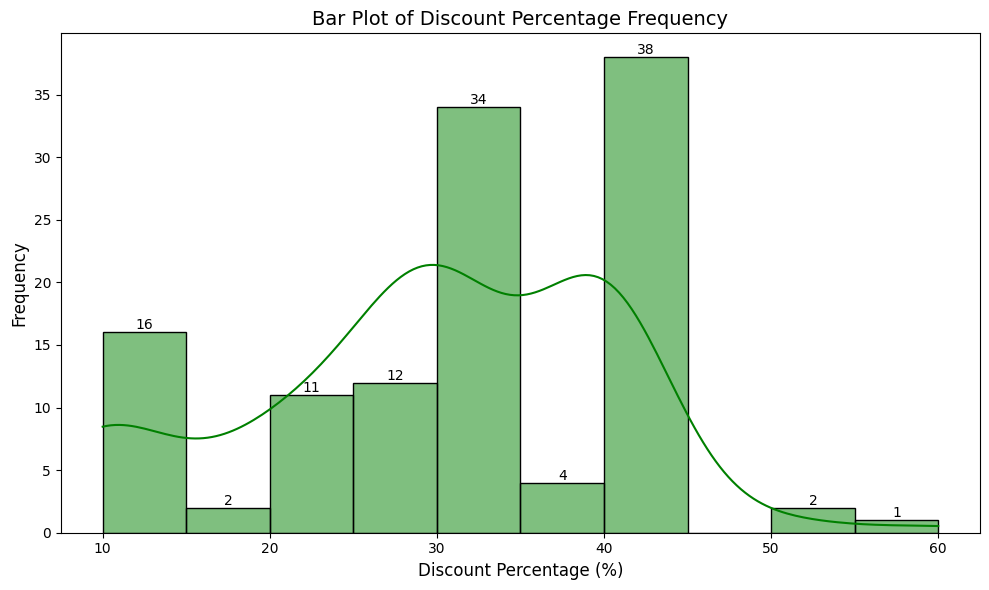

In [33]:


# Filter out rows where the discount is 0 (non-discounted products)
discounted_products = h_and_m[h_and_m['discount'] > 0]

# Create the bar plot for discounted products
plt.figure(figsize=(10, 6))
ax = sns.histplot(discounted_products['discount'], bins=10, kde=True, color="green", edgecolor="black")

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with a positive height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')
        
plt.title('Bar Plot of Discount Percentage Frequency', fontsize=14)
plt.xlabel('Discount Percentage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


## Customer segmenation analysis - K means

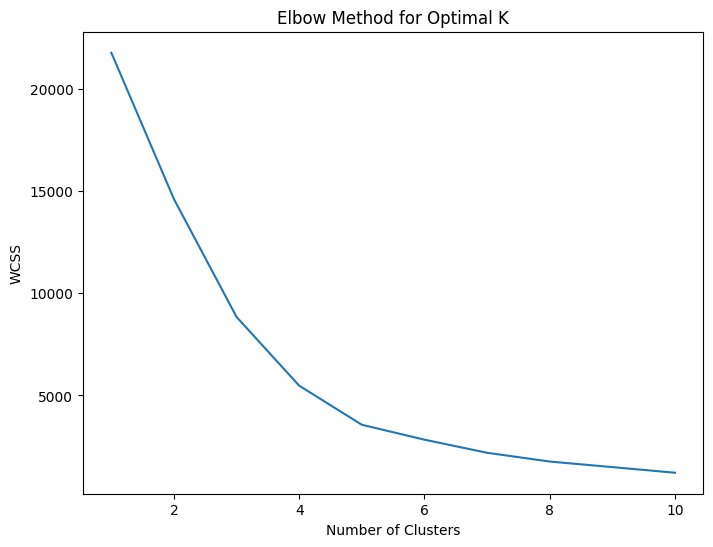

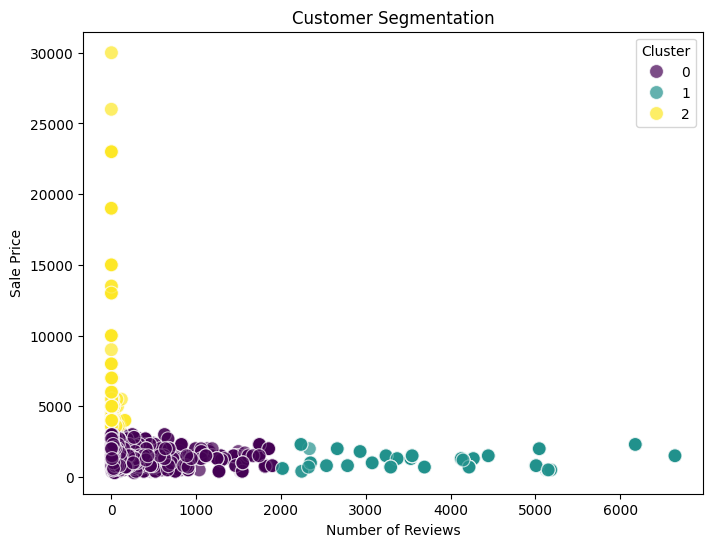

         no_of_reviews          mrp   sale_price
Cluster                                         
0           106.112084  1701.897628  1695.081834
1          3991.079602  1242.781095  1242.781095
2             5.061697  4965.709512  4965.709512


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant columns for segmentation
features = ['no_of_reviews', 'mrp', 'sale_price']  # Add other features as necessary

# Filter data and handle missing values
data = h_and_m[features].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow graph, let's assume K=3 is the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['no_of_reviews'], y=data['sale_price'], hue=data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('Number of Reviews')
plt.ylabel('Sale Price')
plt.legend(title='Cluster')
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


In [35]:
# Profile each cluster
cluster_profiles = data.groupby('Cluster').agg({
    'no_of_reviews': ['mean', 'std'],
    'mrp': ['mean', 'std'],
    'sale_price': ['mean', 'std']
})

print(cluster_profiles)


        no_of_reviews                       mrp                sale_price  \
                 mean          std         mean          std         mean   
Cluster                                                                     
0          106.112084   253.301857  1701.897628   660.865489  1695.081834   
1         3991.079602  1314.338436  1242.781095   526.852571  1242.781095   
2            5.061697    15.040102  4965.709512  2524.374810  4965.709512   

                      
                 std  
Cluster               
0         666.642538  
1         526.852571  
2        2524.374810  


<Figure size 1200x800 with 0 Axes>

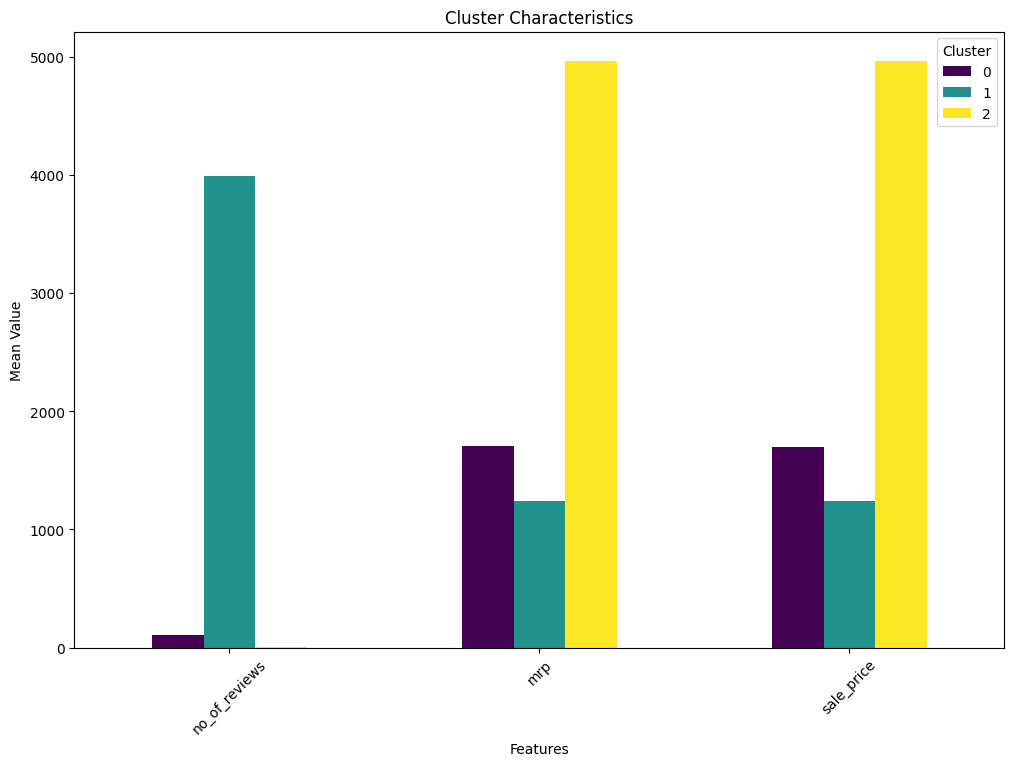

In [36]:
cluster_means = cluster_summary.T  # Transpose for better visualization
plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Cluster Characteristics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()





### Summary Insights:

1. **Cluster 0**: This segment consists of customers who are less engaged (low reviews), but buy at full price, suggesting they may value **premium products** or **exclusive offerings**. A strategy focused on high-end or premium items, possibly with a focus on **quality over price**, could be effective.
   
2. **Cluster 1**: These customers show **moderate engagement** and slightly lower price sensitivity (as seen from the close match between `mrp` and `sale_price`). They are also moderately responsive to purchasing, so **personalized offers**, **moderate promotions**, or **seasonal sales** might drive further sales.

3. **Cluster 2**: They have **low reviews**, but the sales are significantly higher. These customers might be ideal targets for **loyalty programs** or **customer feedback-based rewards** to convert them into frequent buyers.

### Recommendations for Strategy:

- **Cluster 0**: Focus on **premium offerings**, and consider loyalty programs or exclusive product lines to maintain their engagement.
- **Cluster 1**: Offer **moderate promotions** to increase repeat purchases. Consider creating a **special membership** for these customers, rewarding them with exclusive offers.
- **Cluster 2**: Incentivize them to purchase more with **rewards for reviews** or **discounts on future purchases**. Focus on converting them into repeat buyers by offering personalized discounts.



## Seasonality Analysis

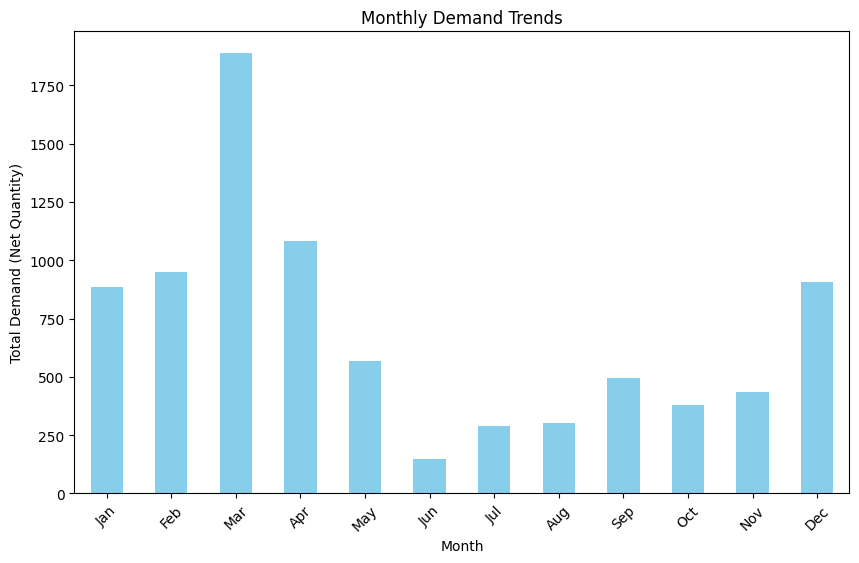

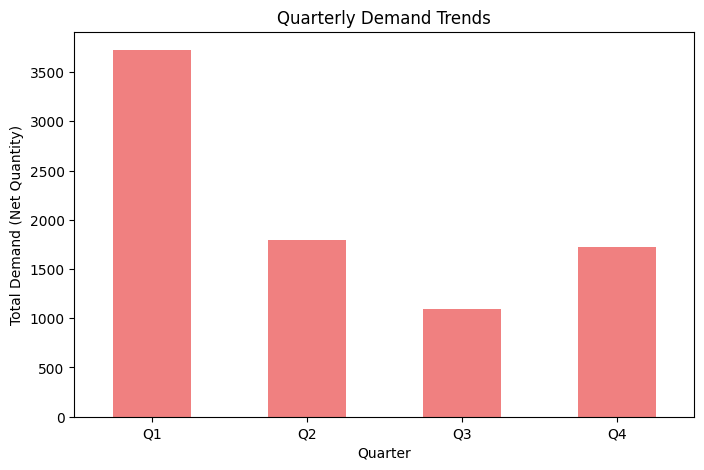

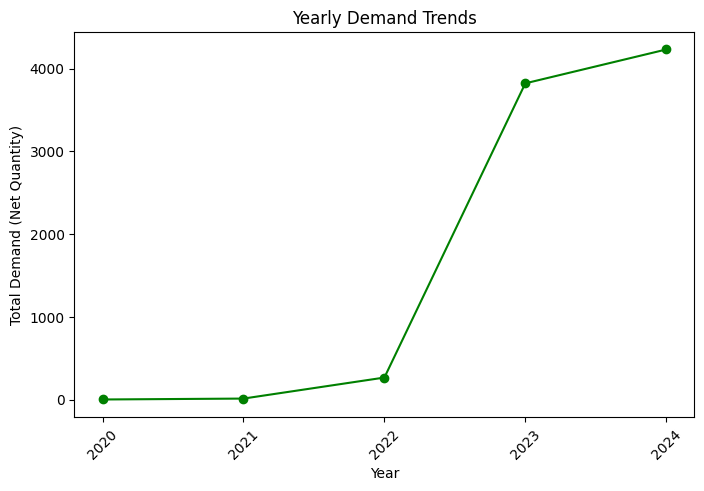

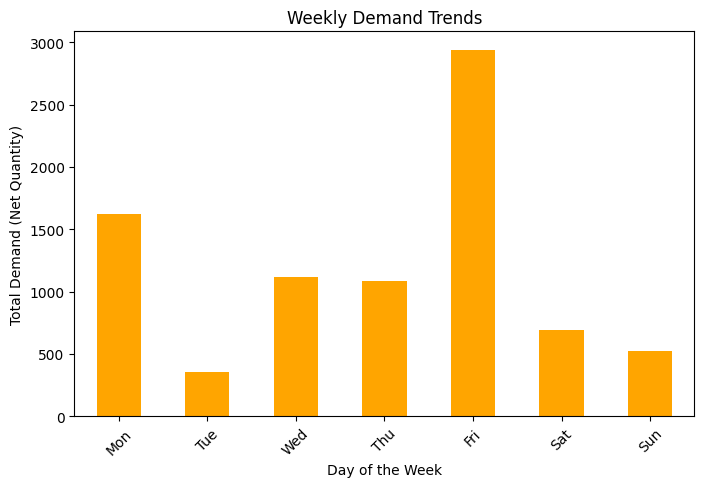

In [37]:



# 'date_of_import' is in datetime format
h_and_m['date_of_import'] = pd.to_datetime(h_and_m['date_of_import'], errors='coerce')

# Drop rows where 'date_of_import' or 'net_quantity_cleaned' are missing
data = h_and_m[['date_of_import', 'net_quantity_cleaned']].dropna()

# Extract additional time-based features (Month, Quarter, Day of Week, etc.)
data['month'] = data['date_of_import'].dt.month
data['quarter'] = data['date_of_import'].dt.quarter
data['day_of_week'] = data['date_of_import'].dt.dayofweek
data['year'] = data['date_of_import'].dt.year

# Aggregating by month to see demand trends
monthly_demand = data.groupby('month')['net_quantity_cleaned'].sum()

# Plotting demand trends by month
plt.figure(figsize=(10, 6))
monthly_demand.plot(kind='bar', color='skyblue')
plt.title('Monthly Demand Trends')
plt.xlabel('Month')
plt.ylabel('Total Demand (Net Quantity)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Aggregating by quarter to see demand trends
quarterly_demand = data.groupby('quarter')['net_quantity_cleaned'].sum()

# Plotting demand trends by quarter
plt.figure(figsize=(8, 5))
quarterly_demand.plot(kind='bar', color='lightcoral')
plt.title('Quarterly Demand Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Demand (Net Quantity)')
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.show()

# Aggregating by year to observe year-over-year trends
yearly_demand = data.groupby('year')['net_quantity_cleaned'].sum()

# Plotting demand trends by year
plt.figure(figsize=(8, 5))
yearly_demand.plot(kind='line', marker='o', color='green')
plt.title('Yearly Demand Trends')
plt.xlabel('Year')
plt.ylabel('Total Demand (Net Quantity)')
plt.xticks(yearly_demand.index, rotation=45)
plt.show()

# Optional: Aggregating by day of the week to see if there's any weekly pattern
weekly_demand = data.groupby('day_of_week')['net_quantity_cleaned'].sum()

# Plotting demand trends by day of the week
plt.figure(figsize=(8, 5))
weekly_demand.plot(kind='bar', color='orange')
plt.title('Weekly Demand Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Demand (Net Quantity)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


### **Trends**:

- Quarterly Trends: Identifying patterns in Q1, Q2, Q3, and Q4 allows to see how demand varies during different seasons. 

- Yearly Trends: Year-over-year growth or decline could highlight long-term changes in the market or indicate whether H&M is expanding its reach, offering new products, or improving sales performance.

- Weekly Trends: Understanding which days of the week see the highest sales can inform store operations or digital promotions. For example, if Fridays see the most sales, you might focus on promotional campaigns that run towards the end of the week.

- Monthly Trends: Help to identify demand fluctuations based on months.March had the highest sales based on monthly demand trends.



## Predictive analysis: Sales price

In [38]:
# Ensure the discount percentage column is created
h_and_m['discount_percentage'] = (h_and_m['mrp'] - h_and_m['sale_price']) / h_and_m['mrp'] * 100

# Check if the column is created
print(h_and_m[['mrp', 'sale_price', 'discount_percentage']].head())


    mrp  sale_price  discount_percentage
0  2299        2299             0.000000
1  2299        2299             0.000000
2  2299        2299             0.000000
3  1499        1499             0.000000
4  1499        1199            20.013342


Mean Squared Error (MSE): 336.27870384102016
R-Squared (R²): 0.9998625131942109


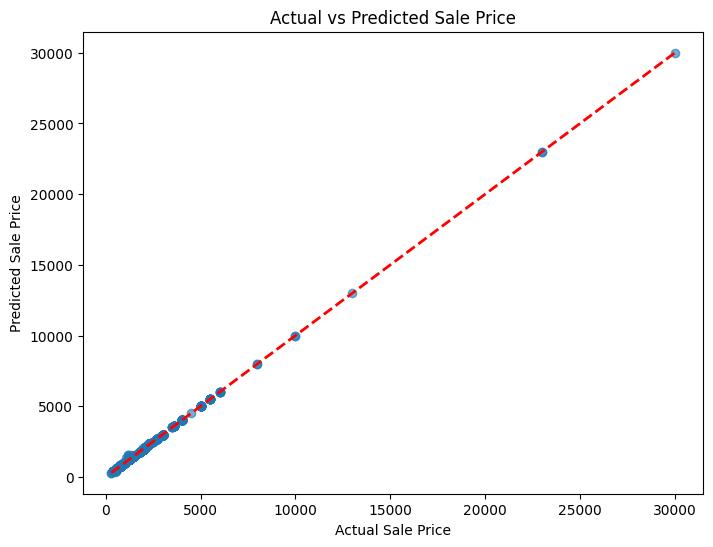

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features for the model: MRP and discount percentage
X = h_and_m[['mrp', 'discount_percentage', 'no_of_reviews']]
y = h_and_m['sale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared (R²): {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()


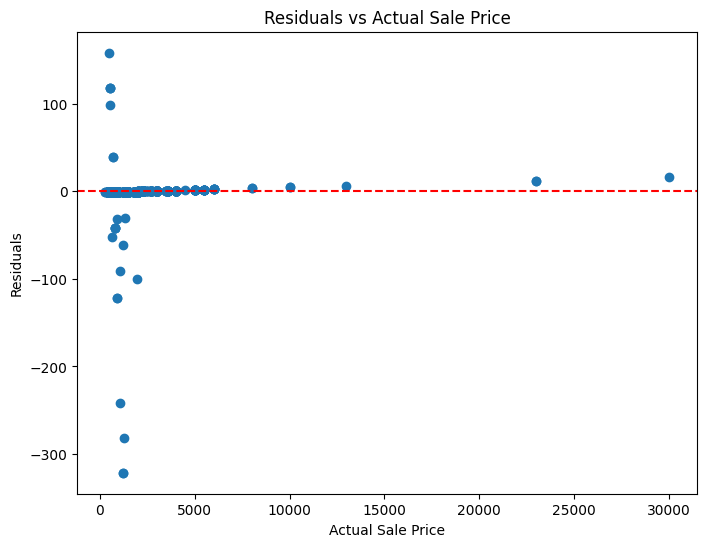

In [40]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals')
plt.show()
